Made by : Clarissa Beatrice Kosasih   

# A. EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
# READ DATA WITH TAB SEPARATOR

data = pd.read_csv('3A.tsv', sep='\t')
data.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [ ]:
# CHECK DATA TYPES AND INFORMATION

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

The dataset consists of a total of 17 columns; 8 columns with float data types, 2 column with integer data type, and 7 categorical columns. There is a significant amount of missing data, especially in the 'Critic_Score' and 'Critic_Count' column. Also, 'User_Score' should be float not object.

In [ ]:
data['User_Score'].value_counts()

,count
User_Score,
tbd,2441
7.8,326
8,296
8.2,285
8.3,259
...,...
1.5,2
0.3,2
1.1,2


In [ ]:
# Drop rows where User_Score is 'tbd'
data = data[data['User_Score'] != 'tbd']
data['User_Score'] = data['User_Score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14487 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            14487 non-null  int64  
 1   Name             14485 non-null  object 
 2   Platform         14487 non-null  object 
 3   Year_of_Release  14487 non-null  int64  
 4   Genre            14485 non-null  object 
 5   Publisher        14434 non-null  object 
 6   NA_Sales         14487 non-null  float64
 7   EU_Sales         14487 non-null  float64
 8   JP_Sales         14487 non-null  float64
 9   Other_Sales      14487 non-null  float64
 10  Global_Sales     14487 non-null  float64
 11  Critic_Score     7172 non-null   float64
 12  Critic_Count     7172 non-null   float64
 13  User_Score       7718 non-null   float64
 14  User_Count       14487 non-null  float64
 15  Developer        7821 non-null   object 
 16  Rating           7702 non-null   object 
dtypes: float64(9), in

<ipython-input-177-a14efa86176c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['User_Score'] = data['User_Score'].astype(float)


## Handling Missing Values

In [ ]:
# COUNT MISSING VALUES
na_ammount = data.isna().sum()
na_percentage = (na_ammount / len(data)) * 100

pd.DataFrame({
    'Missing Values': na_ammount,
    'Percentage (%)': na_percentage
})

,Missing Values,Percentage (%)
index,0,0.000000
Name,2,0.013805
Platform,0,0.000000
Year_of_Release,0,0.000000
Genre,2,0.013805
Publisher,53,0.365845
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000


Column 'Critic_Score', 'Critic_Count', and 'User_Score' contains high number of missing values. Since the need is to build a content-based recommender system, these columns are not highly relevant, thus we can drop them.

'Developer' and 'Rating' are more relevant for this purpose, so even though it has a high percentage of missing values, we don't drop the column.

In [ ]:
# DROP COLUMN
data = data.drop(['Critic_Score', 'Critic_Count', 'User_Score'], axis=1) # drop column
data.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-92.0,NaN,NaN


In [ ]:
# COUNT MISSING VALUES (ROW) LEFT
data.isna().sum()

,0
index,0
Name,2
Platform,0
Year_of_Release,0
Genre,2
Publisher,53
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# DROP DATA WITH MISSING VALUES

data = data.dropna()
data.isna().any().sum()

0

Data is clean.

## Handling Duplicates

In [ ]:
# DROP DUPLICATES (ignore column index)
data = data.drop_duplicates(subset=data.columns.difference(['index']))
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7572 entries, 0 to 16884
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            7572 non-null   int64  
 1   Name             7572 non-null   object 
 2   Platform         7572 non-null   object 
 3   Year_of_Release  7572 non-null   int64  
 4   Genre            7572 non-null   object 
 5   Publisher        7572 non-null   object 
 6   NA_Sales         7572 non-null   float64
 7   EU_Sales         7572 non-null   float64
 8   JP_Sales         7572 non-null   float64
 9   Other_Sales      7572 non-null   float64
 10  Global_Sales     7572 non-null   float64
 11  User_Count       7572 non-null   float64
 12  Developer        7572 non-null   object 
 13  Rating           7572 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 887.3+ KB


After removing missing values, duplicates, and unique columns, the final dataset consists of 14 columns and 7696 rows.

## Numerical Distribution

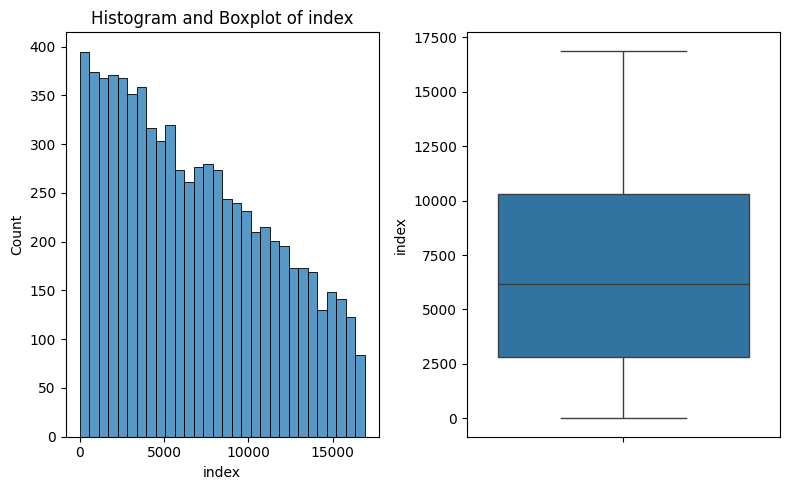

Skewness:  0.3836302711063975
Kurtosis:  -0.9515578458014033


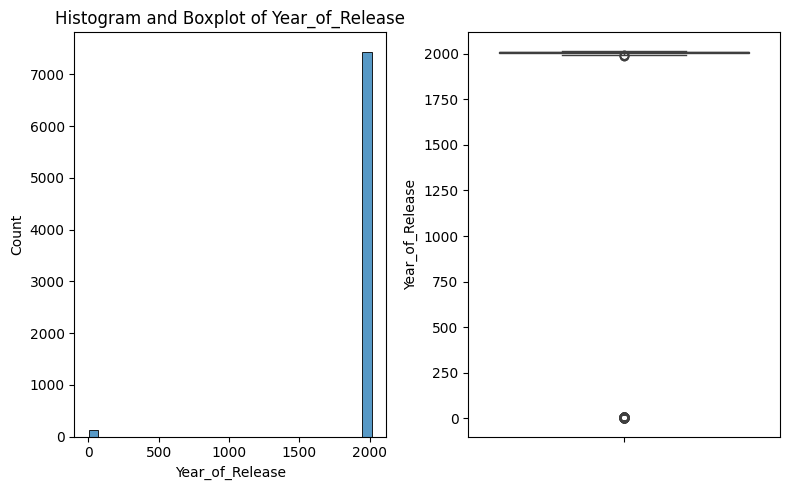

Skewness:  -7.372850453620668
Kurtosis:  52.388190964803755


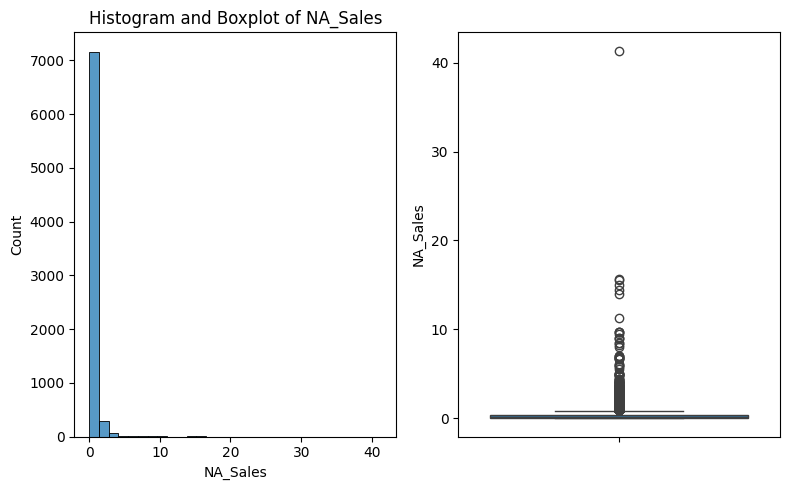

Skewness:  16.64030095052972
Kurtosis:  561.4958346592097


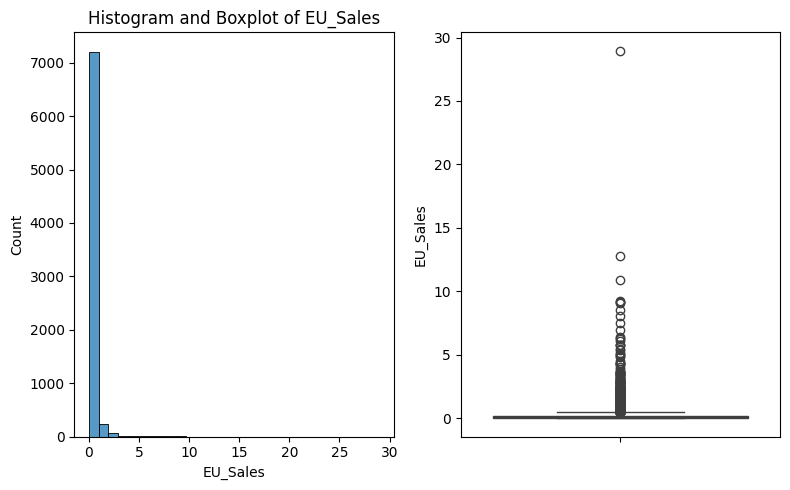

Skewness:  16.540487062064372
Kurtosis:  539.7717462621292


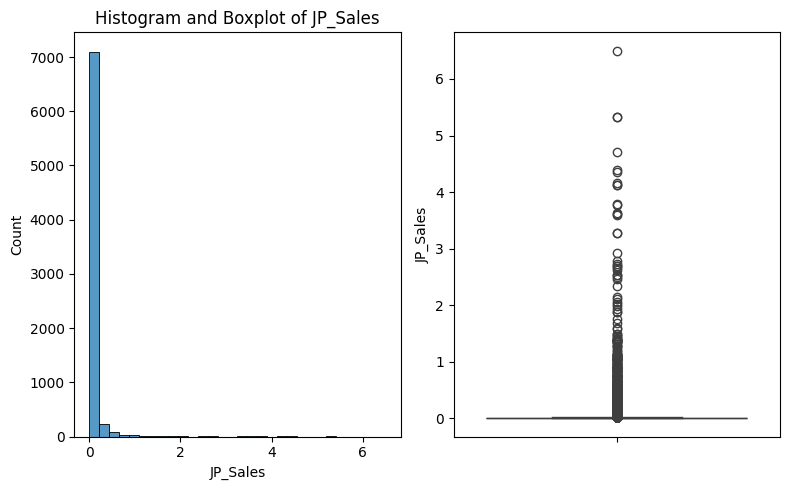

Skewness:  11.038864512671497
Kurtosis:  163.1394928217894


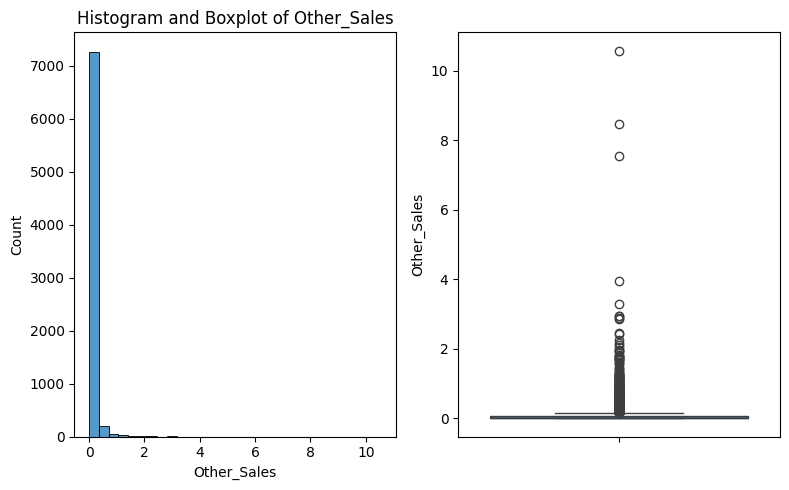

Skewness:  19.490609121459915
Kurtosis:  616.3315822250078


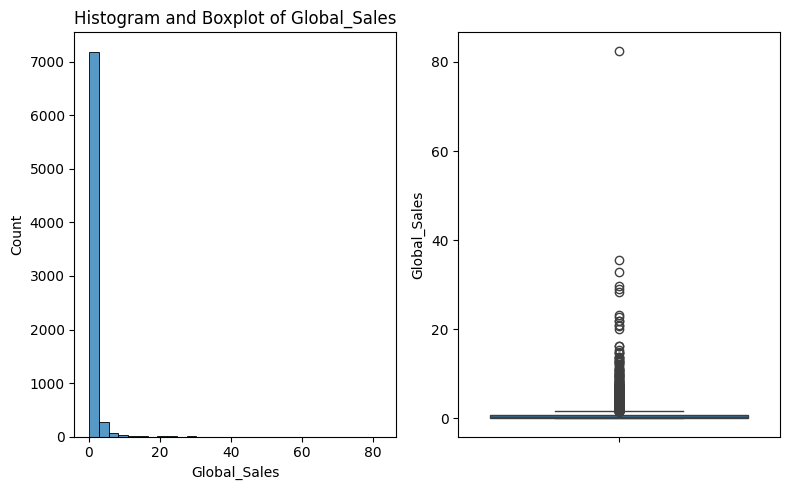

Skewness:  16.62815877809391
Kurtosis:  542.1039174865508


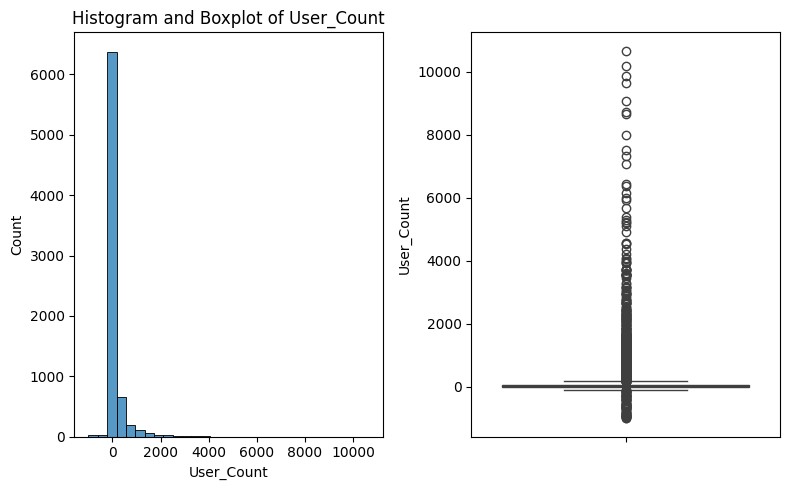

Skewness:  8.836135003758187
Kurtosis:  109.39712019484274


In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns

for i in numerical_cols:
  plt.figure(figsize=(8, 5))
  plt.subplot(1,2,1)
  sns.histplot(data[i], bins = 30)
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(data[i])
  plt.tight_layout()
  plt.show()
  print("Skewness: ", data[i].skew())
  print("Kurtosis: ", data[i].kurt())

**Anomalies:**
- In column 'Year_of_Release' there are data's with value not in year format (not 4 digits long).
- User_Count with values below 0.

In [ ]:
# IDENTIFY INVALID YEARS

invalid_years = data[data['Year_of_Release'].apply(lambda x: len(str(x)) != 4)]
invalid_years['Year_of_Release'].shape

(132,)

There is 132 rows with invalid year, because 132 is small compared to total data, invalid year will be imputed with median.

In [ ]:
# IMPUTE YEAR
data['Year_of_Release'] = data['Year_of_Release'].apply(lambda x: np.NaN if len(str(x)) != 4 else x) # change invalid year with NaN
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())

data['Year_of_Release'].value_counts()

,count
Year_of_Release,
2008.0,792
2007.0,630
2009.0,612
2005.0,585
2006.0,556
2003.0,518
2011.0,494
2004.0,492
2010.0,473


In [ ]:
# Change datatype
data['Year_of_Release'] = data['Year_of_Release'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7572 entries, 0 to 16884
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            7572 non-null   int64  
 1   Name             7572 non-null   object 
 2   Platform         7572 non-null   object 
 3   Year_of_Release  7572 non-null   int64  
 4   Genre            7572 non-null   object 
 5   Publisher        7572 non-null   object 
 6   NA_Sales         7572 non-null   float64
 7   EU_Sales         7572 non-null   float64
 8   JP_Sales         7572 non-null   float64
 9   Other_Sales      7572 non-null   float64
 10  Global_Sales     7572 non-null   float64
 11  User_Count       7572 non-null   float64
 12  Developer        7572 non-null   object 
 13  Rating           7572 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 887.3+ KB


In [ ]:
# IMPUTE INVALID USER COUNT

invalid_user_count = data[data['User_Count'] < 0]
print(f"Number of invalid rows in 'User_Count': {len(invalid_user_count)}")
data.loc[data['User_Count'] < 0, 'User_Count'] = np.NaN
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())

print(data['User_Count'].describe())

Number of invalid rows in 'User_Count': 70
count     7572.000000
mean       161.453249
std        561.692076
min          4.000000
25%         10.000000
50%         24.000000
75%         79.000000
max      10665.000000
Name: User_Count, dtype: float64


Invalid year and invalid user count has been changed.

### Updated Numerical Distribution

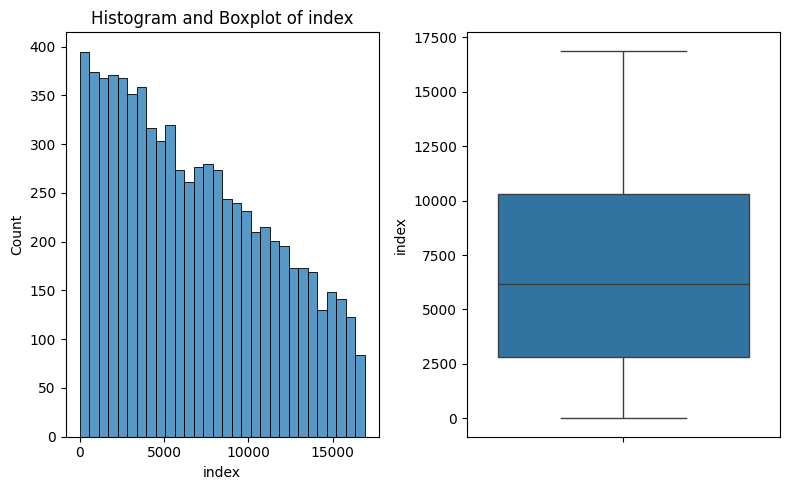

Skewness:  0.3836302711063975
Kurtosis:  -0.9515578458014033


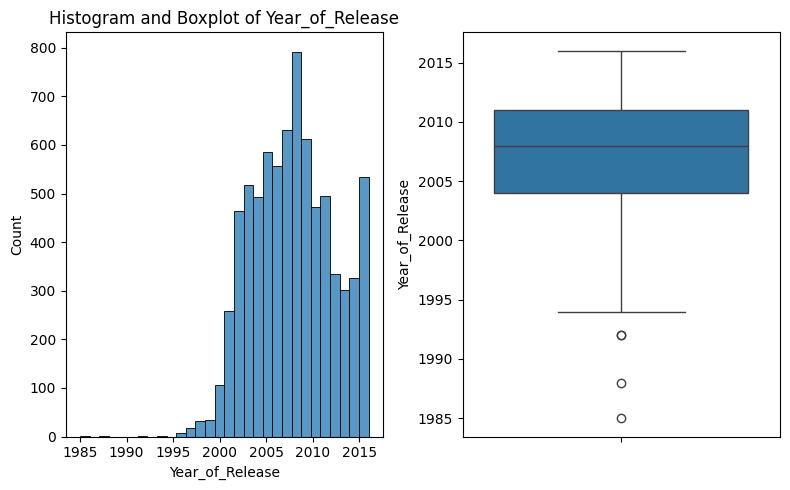

Skewness:  0.05670286544755803
Kurtosis:  -0.5097213425129006


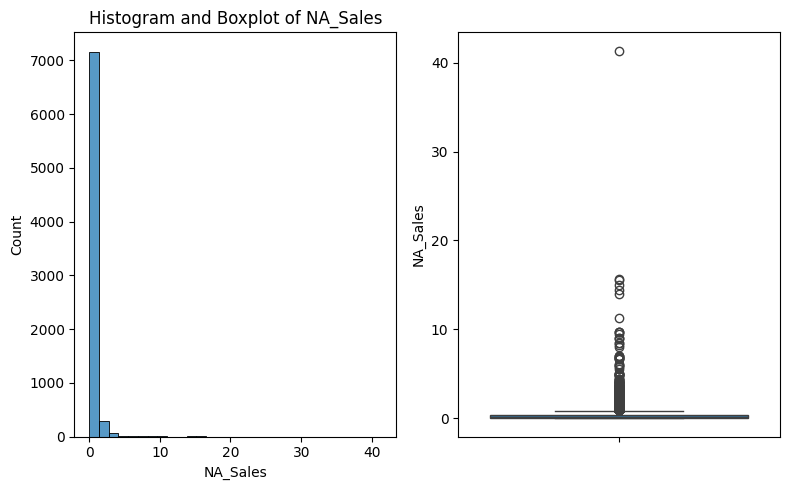

Skewness:  16.64030095052972
Kurtosis:  561.4958346592097


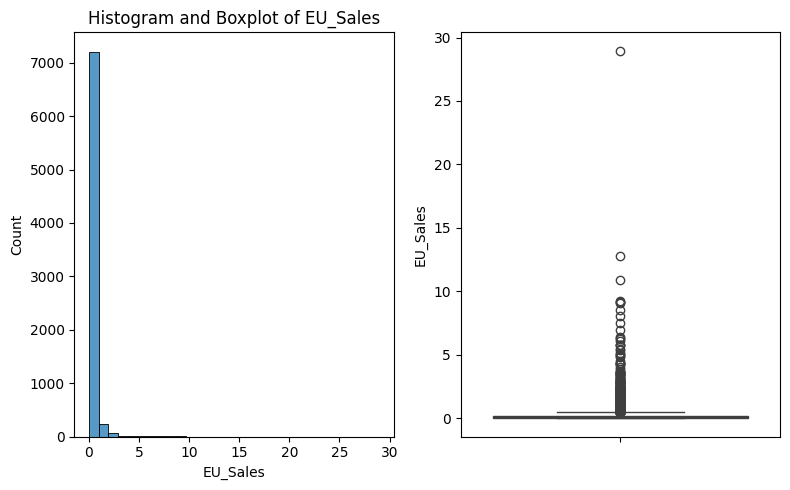

Skewness:  16.540487062064372
Kurtosis:  539.7717462621292


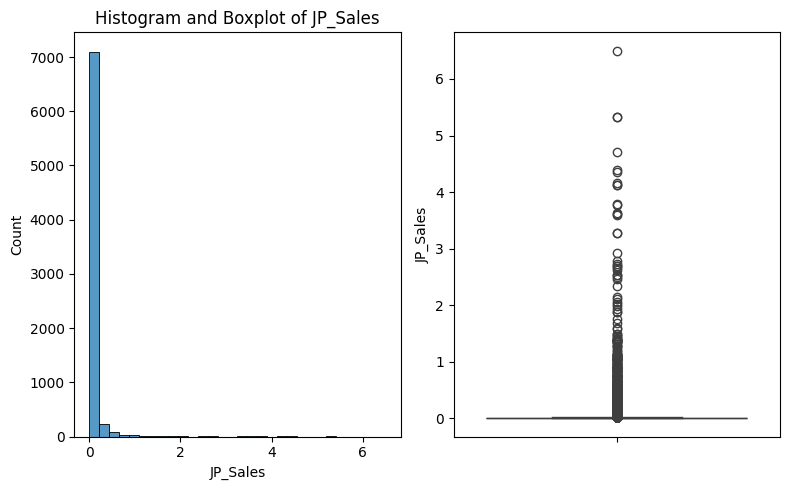

Skewness:  11.038864512671497
Kurtosis:  163.1394928217894


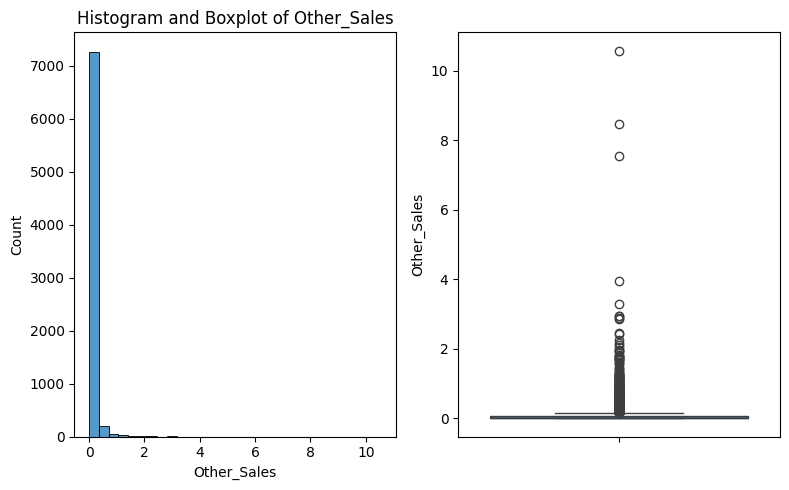

Skewness:  19.490609121459915
Kurtosis:  616.3315822250078


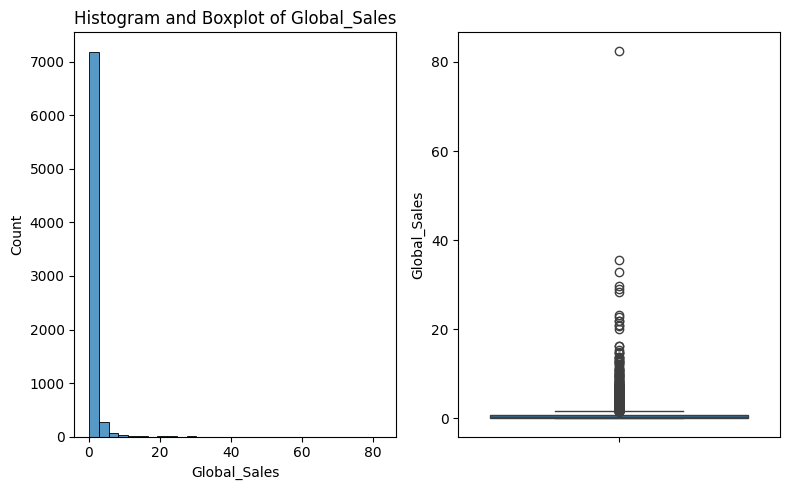

Skewness:  16.62815877809391
Kurtosis:  542.1039174865508


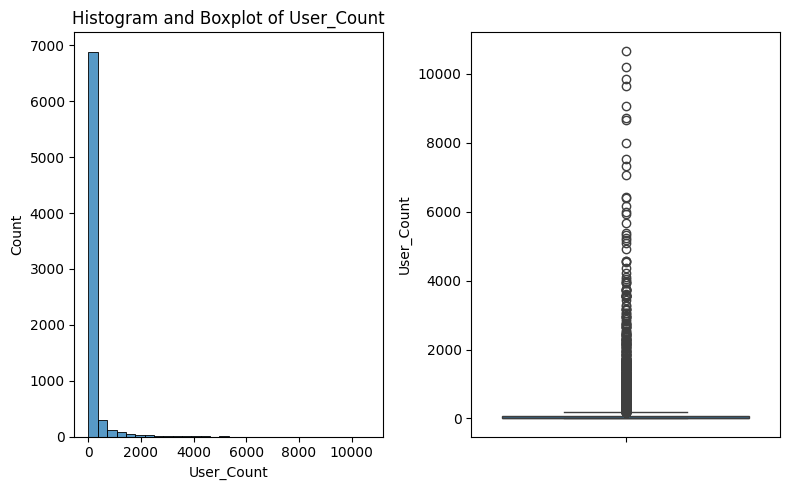

Skewness:  9.03794222145358
Kurtosis:  112.50507431091022


In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns

for i in numerical_cols:
  plt.figure(figsize=(8, 5))
  plt.subplot(1,2,1)
  sns.histplot(data[i], bins = 30)
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(data[i])
  plt.tight_layout()
  plt.show()
  print("Skewness: ", data[i].skew())
  print("Kurtosis: ", data[i].kurt())

In [ ]:
# STATISTICAL TEST: NORMAL DISTRIBUTION OR NOT
from scipy.stats import shapiro

for i in numerical_cols:
  # print(f'{i}:', shapiro(data[i]))

  if shapiro(data[i])[1] < 0.05:
    print(f"{i} Not Normal")
  else:
    print(f"{i}Normal")

index Not Normal
Year_of_Release Not Normal
NA_Sales Not Normal
EU_Sales Not Normal
JP_Sales Not Normal
Other_Sales Not Normal
Global_Sales Not Normal
User_Count Not Normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7572.
  res = hypotest_fun_out(*samples, **kwds)


There are outliers and not normally distributed.

## Categorical Distribution

In [ ]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
  print(data[col].value_counts())
  print("---------------------")

Name
Madden NFL 07                           9
Need for Speed: Most Wanted             9
FIFA 15                                 8
LEGO Marvel Super Heroes                8
FIFA Soccer 13                          8
                                       ..
Monsters, Inc. Scream Arena             1
Reel Fishing III                        1
High Heat Major League Baseball 2003    1
Kingdom Under Fire: Circle of Doom      1
STORM: Frontline Nation                 1
Name: count, Length: 4677, dtype: int64
---------------------
Platform
PS2     1242
X360     968
PS3      870
PC       736
XB       586
Wii      564
DS       534
PSP      422
GC       366
GBA      260
PS4      249
XOne     176
3DS      175
PS       165
PSV      145
WiiU     100
DC        14
Name: count, dtype: int64
---------------------
Genre
Action          1822
Sports          1103
Shooter          919
Role-Playing     747
Racing           641
Misc             443
Platform         429
Fighting         398
Simulation       34

There is no anomalies found in the categorical columns.

# B. Recommender System

Choosing features to use:
- Developer
- Rating
- Platform
- Genre
- Publisher



## Make Soup Feature
"soup feature" refers to a combination or collection of features derived from various attributes of the content.

In [ ]:
# new variable to store data
data_cb = data.copy()
data_cb.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,322.0,Nintendo,E
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,192.0,Nintendo,E
6,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,431.0,Nintendo,E
7,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,129.0,Nintendo,E


In [ ]:
# SOUP FUNCTION

def create_soup(row):
    return f"{row['Developer']} {row['Rating']} {row['Platform']} {row['Genre']} {row['Publisher']}"

data_cb['soup'] = data_cb.apply(create_soup, axis=1)

In [ ]:
print(data_cb['soup'].iloc[0])

Nintendo E Wii Sports Nintendo


The values are combined into a single soup feature.

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data_cb['soup'])

In [ ]:
# COSINE SIMILARITY

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
def show_recs(title, cosine_sim = cosine_sim, num_recommend = 5):
    indices = pd.Series(data_cb.index, index = data_cb['Name']).drop_duplicates()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_similar = sim_scores[1:num_recommend+1]
    movie_indices = [i[0] for i in top_similar]
    result = pd.DataFrame(data_cb['Name'].iloc[movie_indices])

    result['score'] = np.array(top_similar)[:,1]

    return result

# C. Analyze result

## Input 1

In [ ]:
# OUTPUT OF RECOMMENDATION SYSTEM

show_recs('Mario Kart Wii')

,Name,score
3,Wii Sports Resort,1.000000
13,Wii Fit,1.000000
15,Wii Fit Plus,1.000000
107,The Legend of Zelda: Twilight Princess,0.922337
209,Link's Crossbow Training,0.903696


In [ ]:
# ROW OF INPUT

data_cb.loc[data_cb['Name'].isin(['Mario Kart Wii'])]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,soup
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,709.0,Nintendo,E,Nintendo E Wii Racing Nintendo


In [ ]:
# PRINT ROWS OF RECOMMENDS

index = [3, 13, 15, 107, 209]
data_cb.loc[data_cb['index'].isin(index)]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,soup
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,192.0,Nintendo,E,Nintendo E Wii Sports Nintendo
13,13,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,146.0,Nintendo,E,Nintendo E Wii Sports Nintendo
15,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,52.0,Nintendo,E,Nintendo E Wii Sports Nintendo
107,107,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.74,2.14,0.60,0.68,7.15,1658.0,Nintendo,T,Nintendo T Wii Action Nintendo
209,209,Link's Crossbow Training,Wii,2007,Shooter,Nintendo,3.05,1.17,0.29,0.46,4.98,47.0,Nintendo,T,Nintendo T Wii Shooter Nintendo


**Comparison :**
- The recommended games are from the Publisher and Developer Nintendo
- All recommendations are Wii platform games
- The majority of the recommended games have an "Everyone" rating, with two exceptions.
- The input game belongs to the racing genre, known for its energetic and fast-paced style. This explains why the recommended games feature similar dynamic genres like action, sports, and shooter.

## Input 2

In [ ]:
# OUTPUT OF RECOMMENDATION SYSTEM

show_recs('Kinect Adventures!')

,Name,score
24,Grand Theft Auto: Vice City,1.000000
1543,Manhunt,1.000000
23,Grand Theft Auto V,0.919398
51,Grand Theft Auto IV,0.919398
16,Grand Theft Auto V,0.916576


In [ ]:
# ROW OF INPUT

data_cb.loc[data_cb['Name'].isin(['Kinect Adventures!'])]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,soup
14,14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.0,4.89,0.24,1.69,21.81,106.0,Good Science Studio,E,Good Science Studio E X360 Misc Microsoft Game...


In [ ]:
# PRINT ROWS OF RECOMMENDS

index = [24, 1543, 23, 51, 16]
data_cb.loc[data_cb['index'].isin(index)]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,soup
16,16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,3994.0,Rockstar North,M,Rockstar North M PS3 Action Take-Two Interactive
23,23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,3711.0,Rockstar North,M,Rockstar North M X360 Action Take-Two Interactive
24,24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,730.0,Rockstar North,M,Rockstar North M PS2 Action Take-Two Interactive
51,51,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,2951.0,Rockstar North,M,Rockstar North M X360 Action Take-Two Interactive
1543,1543,Manhunt,PS2,2003,Action,Take-Two Interactive,0.63,0.49,0.00,0.16,1.28,136.0,Rockstar North,M,Rockstar North M PS2 Action Take-Two Interactive


Comparison:
- All of the recommended games are from the Publisher Take-Two Interactive, even though the input is from Microsoft Game Studio.
- The recommendations are X360 (same as input), PS3, and PS2 platform games.
- The input's rating is for everyone. However, the recommended games are mature.
- The input game belongs to the Misc genre, but the recommended games belong to Action.

## Input 3


In [ ]:
show_recs('007: The World is not Enough')

,Name,score
12001,Silent Hill: Origins,1.000000
4189,Silent Hill: Shattered Memories,0.873921
3853,Silent Hill: Origins,0.870423
5897,Silent Hill: Shattered Memories,0.870423
6896,Ghost Rider,0.704070


In [ ]:
# ROW OF INPUT

data_cb.loc[data_cb['Name'].isin(['007: The World is not Enough'])]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,soup
2243,2243,007: The World is not Enough,PS,2000,Action,Electronic Arts,0.51,0.35,0.0,0.06,0.92,44.0,Black Ops Entertainment,T,Black Ops Entertainment T PS Action Electronic...


In [ ]:
index = [12001, 4189, 3853, 5897, 6896]
data_cb.loc[data_cb['index'].isin(index)]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,soup
3853,3853,Silent Hill: Origins,PSP,2007,Action,Konami Digital Entertainment,0.22,0.15,0.04,0.10,0.52,107.0,"Climax Group, Climax Studios",M,"Climax Group, Climax Studios M PSP Action Kona..."
4189,4189,Silent Hill: Shattered Memories,Wii,2009,Action,Konami Digital Entertainment,0.22,0.19,0.01,0.05,0.47,226.0,"Climax Group, Climax Studios",M,"Climax Group, Climax Studios M Wii Action Kona..."
5897,5897,Silent Hill: Shattered Memories,PSP,2010,Action,Konami Digital Entertainment,0.09,0.13,0.01,0.07,0.30,43.0,"Climax Group, Climax Studios",M,"Climax Group, Climax Studios M PSP Action Kona..."
6896,6896,Ghost Rider,PSP,2007,Action,Take-Two Interactive,0.22,0.00,0.00,0.02,0.24,13.0,Climax Group,T,Climax Group T PSP Action Take-Two Interactive
12001,12001,Silent Hill: Origins,PS2,2008,Action,Konami Digital Entertainment,0.03,0.03,0.00,0.01,0.07,59.0,Climax Group,M,Climax Group M PS2 Action Konami Digital Enter...


**Comparison**:
- All of the recommendation and input have the action genre
- The platforms vary (PSP, Wii, PS2), and they differ from the input platform (PS)
- The publishers include Konami Digital Entertainment and Take-Two Interactive, which are also different from the input
- The developers are also different from the input
- The input rating is Teen, but only one recommendation is Teen, while the rest are rated Mature